In [3]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

df=pd.read_csv('../data/miRNA_matrix.csv')
df.loc[df['gender']=='male','gender']=0
df.loc[df['gender']=='female','gender']=1
df.pop('label')
print(df.shape)
df=df.dropna()
print(df.shape)
X_data = df.drop(columns=['gender','file_id']).values
y_data = df['gender'].astype('int32').values
df.head()

(11481, 1883)
(11440, 1883)


,file_id,hsa-let-7a-1,hsa-let-7a-2,hsa-let-7a-3,hsa-let-7b,hsa-let-7c,hsa-let-7d,hsa-let-7e,hsa-let-7f-1,hsa-let-7f-2,...,hsa-mir-942,hsa-mir-943,hsa-mir-944,hsa-mir-95,hsa-mir-9500,hsa-mir-96,hsa-mir-98,hsa-mir-99a,hsa-mir-99b,gender
0,e6590aa5-4fde-416c-aa9b-905ac2ac38a7,13450,13053,13254,15287,1443,854,1686,7984,8409,...,13,0,0,61,0,20,91,237,25942,0
1,f503d46b-0084-4ff8-bf6c-ffcf7c27937c,6247,6014,6079,13157,527,1881,877,1989,2096,...,35,0,0,51,0,41,102,147,37275,1
2,72c8eddf-c84f-436a-8a8d-5b206f7feaa1,75464,75475,76245,125283,10922,3284,8898,33178,33487,...,100,2,478,29,0,54,396,2339,166265,1
3,2daf68a0-2167-4aef-b18d-5cf911e7ccfd,41510,41598,41271,27723,2622,2471,4450,39782,40644,...,29,1,1,23,0,65,335,297,59641,1
4,fa288f78-75ff-4f7a-aa86-3e99857e47e8,7104,6974,7296,11835,1202,444,1953,1286,1213,...,7,1,0,6,0,20,49,443,130246,1


In [31]:
import itertools
from sklearn.preprocessing import StandardScaler
rna=df.drop(columns=['label','gender','file_id']).values

gender=df['gender'].values
diff=[]
for i in (range(rna.shape[1])):
    mydata=rna[:,[i]]
    scaler = StandardScaler()
    scaler.fit(mydata)
    mydata = scaler.transform(mydata)
    kms = KMeans(n_clusters=2, random_state=123).fit(mydata)
    a=(abs(kms.labels_ - gender).sum())
    b=(abs(1-kms.labels_- gender).sum())
    if (a>b):
        a=b
    diff.append((i,a))

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [32]:
yd={}
Xd={}

In [33]:
diff.sort(key=lambda x: x[1])
arr=np.asarray(diff)

count=0

feature = (arr[:,0][0:100])

for g in [0,1]:
    mydata=rna[y_data==g,:]
    mydata=mydata[:,feature]
    scaler = StandardScaler()
    scaler.fit(mydata)
    mydata = scaler.transform(mydata)
    kms = KMeans(n_clusters=2, random_state=123).fit(mydata)
    cluster=kms.labels_
    if (cluster.sum()>cluster.shape[0]/2):
        m=1
    else:
        m=0
    print("gender:",g, " majority: ", sum(cluster==m)," total:",cluster.shape[0])

    Xd[g]=rna[y_data==g,:][cluster==m,:]
    yd[g]=gender[gender==g][cluster==m]
    df.loc[df['gender']==g,'cluster_majority']=(cluster==m)


/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


gender: 0  majority:  5299  total: 5451
gender: 1  majority:  4888  total: 5989


In [34]:
print(Xd[0].shape,Xd[1].shape)
X_data2=np.concatenate((Xd[0],Xd[1]),axis=0)
y_data2=np.concatenate((yd[0],yd[1]),axis=0)
print(X_data2.shape)
y_data2=y_data.astype('int32')
X_data2=X_data.astype("float32")

(5299, 1881) (4888, 1881)
(10187, 1881)


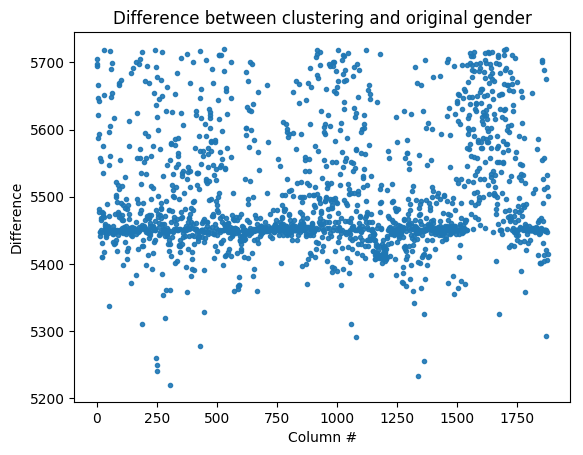

2411


In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use(['default'])
plt.scatter(arr[:,0],arr[:,1],marker='.',alpha='0.9')
#plt.scatter([30,15,7,9],[1,10,5,9],marker='.',alpha='0.9')
plt.ylabel('Difference')
plt.xlabel('Column #')
plt.title('Difference between clustering and original gender')
plt.show()
kms = KMeans(n_clusters=2, random_state=123).fit(rna[:,[arr[:,0][0]]])
abs(1-kms.labels_ - gender).sum()
print(kms.labels_.sum())

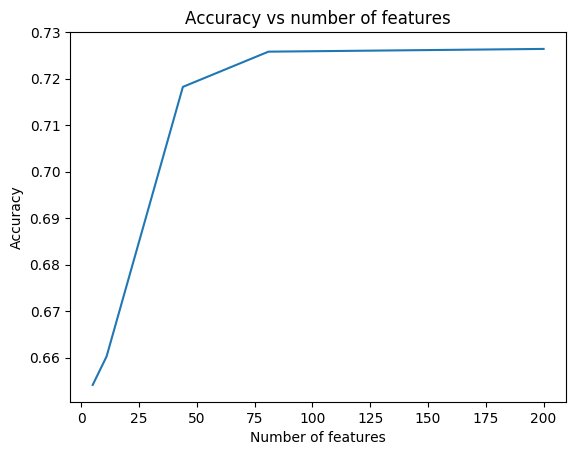

In [36]:
%matplotlib inline
import numpy as np
a=[(200,0.7264055944055944),(81,0.7258158508158508),(44,0.7182400932400932),(11,0.6602564102564102),(5,0.6541375291375291)]
a=np.asarray(a)
plt.style.use(['default'])

plt.plot(a[:,0],a[:,1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.title('Accuracy vs number of features')
plt.show()

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
[2018-12-10 03:06:52,901 - GDC - INFO] Percentage of tumor cases in training set is 0.5231018981018981
[2018-12-10 03:06:52,902 - GDC - INFO] Percentage of tumor cases in test set is 0.523513986013986
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
[2018-12-10 03:10:11,773 - GDC - INFO] selected  features are [189, 240, 305, 507, 640, 1337, 1362, 1364, 1496, 1720, 1721]


number:  11
feature number:  11
LogisticRegression
[0 1 1 ... 0 1 0]


[2018-12-10 03:10:12,193 - GDC - INFO] scores are {'LogisticRegression': [0.6687937062937063, 0.6687937062937063, 0.6687937062937063, 0.6687937062937063, 0.7233535131168592]}


{'C': 1}
['LogisticRegression']


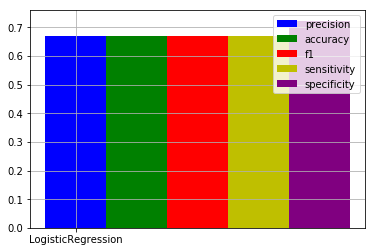

In [6]:
%matplotlib inline
import pandas as pd 
import hashlib
import os 
from utils import logger
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectFromModel
from sklearn import datasets
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from utils import logger
#def lassoSelection(X,y,)

def lassoSelection(X_train, y_train, n):
	'''
	Lasso feature selection.  Select n features. 
	'''
	clf = LassoCV()
	sfm = SelectFromModel(clf, threshold=0)
	sfm.fit(X_train, y_train)
	X_transform = sfm.transform(X_train)
	n_features = X_transform.shape[1]
	while n_features > n:
		sfm.threshold += 0.001
		X_transform = sfm.transform(X_train)
		n_features = X_transform.shape[1]
	features = [index for index,value in enumerate(sfm.get_support()) if value == True  ]
	logger.info("selected  features are {}".format(features))
	print("number: ",len(features))
	return features


def specificity_score(y_true, y_predict):
	'''
	true_negative rate
	'''
	true_negative = len([index for index,pair in enumerate(zip(y_true,y_predict)) if pair[0]==pair[1] and pair[0]==0 ])
	real_negative = np.count_nonzero(y_true == 0)
	#real_negative = len(y_true) - sum(y_true)
	return true_negative / real_negative 

def model_fit_predict(X_train,X_test,y_train,y_test):

	np.random.seed(201)
	from sklearn.linear_model import LogisticRegression
	from sklearn.ensemble import RandomForestClassifier
	from sklearn.ensemble import AdaBoostClassifier
	from sklearn.ensemble import GradientBoostingClassifier
	from sklearn.ensemble import ExtraTreesClassifier
	from sklearn.svm import SVC
	from sklearn.metrics import precision_score
	from sklearn.metrics import accuracy_score
	from sklearn.metrics import f1_score
	from sklearn.metrics import recall_score
	models = {
		#'LogisticRegression': LogisticRegression(),
		#'ExtraTreesClassifier': ExtraTreesClassifier(),
		'RandomForestClassifier': RandomForestClassifier(),
    	#'AdaBoostClassifier': AdaBoostClassifier(),
    	#'GradientBoostingClassifier': GradientBoostingClassifier(),
    	#'SVC': SVC()
	}
	tuned_parameters = {
		#'LogisticRegression':{'C': [1, 50]},
	#	'ExtraTreesClassifier': { 'n_estimators': [16, 32] },
		'RandomForestClassifier': { 'n_estimators': [500, 500] },
    	#'AdaBoostClassifier': { 'n_estimators': [16, 32] },
    	#'GradientBoostingClassifier': { 'n_estimators': [16, 32], 'learning_rate': [0.8, 1.0] },
    	#'SVC': {'kernel': ['rbf'], 'C': [1, 10], 'gamma': [0.001, 0.0001]},
	}
	scores= {}
	for key in models:
		print (key)
		clf = GridSearchCV(models[key], tuned_parameters[key], scoring=None,  refit=True, cv=10)
		#print (clf.best_params_)
		print(y_train)
		clf.fit(X_train,y_train)
		print (clf.best_params_)
		y_test_predict = clf.predict(X_test)
		precision = precision_score(y_test, y_test_predict, average='micro')
		accuracy = accuracy_score(y_test, y_test_predict)
		f1 = f1_score(y_test, y_test_predict,average='micro')
		recall = recall_score(y_test, y_test_predict,average='micro')
		specificity = specificity_score(y_test, y_test_predict)
		scores[key] = [precision,accuracy,f1,recall,specificity]
	#print(scores)
	return scores, y_test_predict



def draw(scores):
	'''
	draw scores.
	'''
	import matplotlib.pyplot as plt
	logger.info("scores are {}".format(scores))
	ax = plt.subplot(111)
	precisions = []
	accuracies =[]
	f1_scores = []
	recalls = []
	categories = []
	specificities = []
	N = len(scores)
	ind = np.arange(N)  # set the x locations for the groups
	width = 0.1        # the width of the bars
	for key in scores:
		categories.append(key)
		precisions.append(scores[key][0])
		accuracies.append(scores[key][1])
		f1_scores.append(scores[key][2])
		recalls.append(scores[key][3])
		specificities.append(scores[key][4])

	precision_bar = ax.bar(ind, precisions,width=0.1,color='b',align='center')
	accuracy_bar = ax.bar(ind+1*width, accuracies,width=0.1,color='g',align='center')
	f1_bar = ax.bar(ind+2*width, f1_scores,width=0.1,color='r',align='center')
	recall_bar = ax.bar(ind+3*width, recalls,width=0.1,color='y',align='center')
	specificity_bar = ax.bar(ind+4*width,specificities,width=0.1,color='purple',align='center')

	print(categories)
	ax.set_xticks(np.arange(N))
	ax.set_xticklabels(categories)
	ax.legend((precision_bar[0], accuracy_bar[0],f1_bar[0],recall_bar[0],specificity_bar[0]), ('precision', 'accuracy','f1','sensitivity','specificity'))
	ax.grid()
	plt.show()

# split the data to train and test set
#X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=0)

#standardize the data.
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_data)
y_test = y_data
# check the distribution of tumor and normal sampels in traing and test data set.
train_tumor_count = np.count_nonzero(y_train > 0)
test_tumor_count = np.count_nonzero(y_test > 0)
logger.info("Percentage of tumor cases in training set is {}".format(train_tumor_count/len(y_train)))
logger.info("Percentage of tumor cases in test set is {}".format(test_tumor_count/len(y_test)))
n = 300
feaures_columns = lassoSelection(X_train, y_train, n)

print("feature number: ",len(feaures_columns))

#scores = model_fit_predict(X_train[:,feaures_columns],X_test[:,feaures_columns],y_train,y_test)
scores,y_predict = model_fit_predict(X_train[:,feaures_columns],X_test[:,feaures_columns],y_train,y_test)
#a=[(200,0.7202797202797203),(99,0.7223193473193473),(44,0.7182400932400932),(11,0.6602564102564102),(5,0.6541375291375291)]
draw(scores)
df['predicted'] = y_predict


In [39]:
df['mislabel']=0
df.loc[(df['gender']!=df['predicted']) & (df['cluster_majority']==False), 'mislabel']=1
print('prediction mismatch: ',df.loc[(df['gender']!=df['predicted'])].shape[0])
#df.to_csv('../data/miRNA_gender.csv')
print ('Number of mislabeling: ',df.loc[df['mislabel']==1].shape[0])
df.loc[df['mislabel']==1].shape[0]/df.shape[0]

prediction mismatch:  951
Number of mislabeling:  137


0.011975524475524475